Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ../../python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.22 which is incompatible.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from workspace_utils import keep_awake, active_session

In [3]:
import torch

# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

## 1. Start the Environment



The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [5]:
from unityagents import UnityEnvironment
import numpy as np

# seed makes env deterministic
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")#, seed=42)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Explore the environment

### 2.1 Examine the State and Action Spaces


In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 2.2 Take Random Actions in the Environment


In [8]:
from collections import namedtuple, deque


In [9]:
scores_deque = deque(maxlen=100)
all_scores_deque = []
all_scores = []
for i in range(5):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_deque.append(max(scores))
    all_scores_deque.append(np.mean(scores_deque))
    all_scores.append(max(scores))
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
    

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291


### 2.3 Explore the average number of steps in an episode

- rewards of +0.1 / -0.01 are only achieved when the ball is hit over the net / drops
- this means that in most steps the rewards are zero --> this makes is potentially hard to train as there are only a few steps with meaningfull rewards


In [18]:
tmax = []
for i in range(100):                                      # play game for 5 episodes
    print(i, end='\r')
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    t=0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        states = env_info.vector_observations         # get next state (for each agent)
        dones = env_info.local_done                        # see if episode finished
        if np.any(dones):                                  # exit loop if episode finished
            tmax.append(t)
            break
        t+=1
print('Average number of steps per episode:', np.mean(tmax))

Average number of steps per episode: 17.04


### 2.4 Evaluate score when taken random steps

- steps taken from a normal distribution, clipped at [-1, 1]
- average score is 0.025
- Note: when using an untrained agent, the average score is significantly lower, approximately zero. This suggest that the untrained agent cannot do sufficient exploration, despite the addition of OUNoise. It might therefore be beneficial to start training with a certain number of episodes where actions are taken from the normal distribution.

In [9]:
scores_deque = deque(maxlen=100)
all_scores_deque = []
all_scores = []
for i in range(5):                                      # play game for 5 episodes
    print(i, end='\r')
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_deque.append(max(scores))
    all_scores_deque.append(np.mean(scores_deque))
    all_scores.append(max(scores))
    

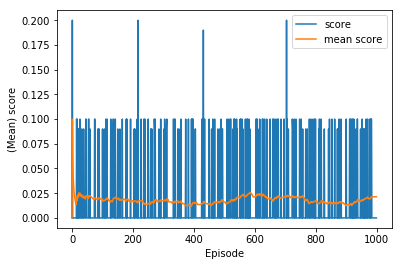

In [12]:
# random actions

plt.plot(range(1000), all_scores, label='score')
plt.plot(range(1000), all_scores_deque, label='mean score')
plt.xlabel('Episode')
plt.ylabel('(Mean) score')
plt.legend()


## Train the agent

In [8]:
from agent import Agent
from utils import seeding

In [25]:
random_seed = 42
n_episodes = 3000
n_random_episodes = 300
t_max = 1000
add_noise=True
noise_decay = 0.999
version = 'v3'

seeding(random_seed)

agent = Agent(state_size=state_size, action_size=action_size, random_seed=random_seed)

In [26]:
scores_deque = deque(maxlen=100)
all_scores = []
all_mean_scores = []

score_max = 0
e_solved = n_episodes
noise = 1

t = 0

for episode in keep_awake(range(n_episodes)):
    
    
    scores = np.zeros(num_agents)             # initialize reward for this episode
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    
    agent.reset()
    
    for _ in range(t_max):
        
        if episode < n_random_episodes:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        else:
            actions = [agent.act(states[agent_i], add_noise=add_noise, noise=noise) for agent_i in range(num_agents)]
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        
        # update scores
        scores += rewards                         
        
        # add step to memory and learn
        for agent_i in range(num_agents):
            agent.step(states[agent_i], actions[agent_i], rewards[agent_i], next_states[agent_i], dones[agent_i], t)

        states = next_states
            
        t += 1
        
        if np.any(dones):
            break 
            
    noise = noise * noise_decay
            
    scores_deque.append(max(scores))
    all_scores.append(max(scores))
    all_mean_scores.append(np.mean(scores_deque))
            
    print('Episode: {0:d} \t - \t Score: {1:.3f} \t - \t Mean score: {2:.3f}'.format(episode, max(scores), np.mean(scores_deque)))

    # save good model
    if np.mean(scores_deque) > 0.5 and np.mean(scores_deque) > score_max:
        print('  --->   Saving checkpoints!')
        torch.save(agent.actor_local.state_dict(), os.path.join(version, 'checkpoint_actor.pth'))
        torch.save(agent.critic_local.state_dict(), os.path.join(version, 'checkpoint_critic.pth'))
        score_max = np.mean(scores_deque)
        e_solved = min(e_solved, episode)
    
    # stop learning when score keeps to be zero or returns to zero
    if episode > 2000 and np.mean(scores_deque)==0:
        print('Abort: agent does not learn (or reached critical forgetting)')
        break
        
    # continue learning after environment is solved for 1000 more episodes to evaluate stability of agent
    if episode == e_solved + 600:
        break


Episode: 0 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
Episode: 1 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
Episode: 2 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
Episode: 3 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
Episode: 4 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
Episode: 5 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
Episode: 6 	 - 	 Score: 0.100 	 - 	 Mean score: 0.014
Episode: 7 	 - 	 Score: 0.000 	 - 	 Mean score: 0.013
Episode: 8 	 - 	 Score: 0.000 	 - 	 Mean score: 0.011
Episode: 9 	 - 	 Score: 0.100 	 - 	 Mean score: 0.020
Episode: 10 	 - 	 Score: 0.000 	 - 	 Mean score: 0.018
Episode: 11 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
Episode: 12 	 - 	 Score: 0.000 	 - 	 Mean score: 0.015
Episode: 13 	 - 	 Score: 0.000 	 - 	 Mean score: 0.014
Episode: 14 	 - 	 Score: 0.000 	 - 	 Mean score: 0.013
Episode: 15 	 - 	 Score: 0.000 	 - 	 Mean score: 0.013
Episode: 16 	 - 	 Score: 0.000 	 - 	 Mean score: 0.012
Episode: 17 	 - 	 Score: 0.100 	 - 	 Mean score: 0.017
Episode: 18 	 - 	 Sc

Episode: 149 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 150 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 151 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 152 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 153 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 154 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 155 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 156 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 157 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
Episode: 158 	 - 	 Score: 0.100 	 - 	 Mean score: 0.018
Episode: 159 	 - 	 Score: 0.000 	 - 	 Mean score: 0.018
Episode: 160 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
Episode: 161 	 - 	 Score: 0.100 	 - 	 Mean score: 0.018
Episode: 162 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
Episode: 163 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
Episode: 164 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
Episode: 165 	 - 	 Score: 0.000 	 - 	 Mean score: 0.016
Episode: 166 	 - 	 Score: 0.000 	 - 	 Mean score

Episode: 296 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 297 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 298 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 299 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 300 	 - 	 Score: 0.100 	 - 	 Mean score: 0.019
Episode: 301 	 - 	 Score: 0.090 	 - 	 Mean score: 0.019
Episode: 302 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
Episode: 303 	 - 	 Score: 0.090 	 - 	 Mean score: 0.020
Episode: 304 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
Episode: 305 	 - 	 Score: 0.090 	 - 	 Mean score: 0.021
Episode: 306 	 - 	 Score: 0.100 	 - 	 Mean score: 0.021
Episode: 307 	 - 	 Score: 0.100 	 - 	 Mean score: 0.021
Episode: 308 	 - 	 Score: 0.100 	 - 	 Mean score: 0.021
Episode: 309 	 - 	 Score: 0.100 	 - 	 Mean score: 0.022
Episode: 310 	 - 	 Score: 0.000 	 - 	 Mean score: 0.022
Episode: 311 	 - 	 Score: 0.090 	 - 	 Mean score: 0.023
Episode: 312 	 - 	 Score: 0.100 	 - 	 Mean score: 0.024
Episode: 313 	 - 	 Score: 0.090 	 - 	 Mean score

Episode: 443 	 - 	 Score: 0.500 	 - 	 Mean score: 0.159
Episode: 444 	 - 	 Score: 0.100 	 - 	 Mean score: 0.159
Episode: 445 	 - 	 Score: 0.000 	 - 	 Mean score: 0.158
Episode: 446 	 - 	 Score: 0.100 	 - 	 Mean score: 0.158
Episode: 447 	 - 	 Score: 0.100 	 - 	 Mean score: 0.159
Episode: 448 	 - 	 Score: 0.000 	 - 	 Mean score: 0.159
Episode: 449 	 - 	 Score: 0.300 	 - 	 Mean score: 0.161
Episode: 450 	 - 	 Score: 0.100 	 - 	 Mean score: 0.161
Episode: 451 	 - 	 Score: 0.200 	 - 	 Mean score: 0.162
Episode: 452 	 - 	 Score: 0.100 	 - 	 Mean score: 0.161
Episode: 453 	 - 	 Score: 1.800 	 - 	 Mean score: 0.179
Episode: 454 	 - 	 Score: 0.100 	 - 	 Mean score: 0.179
Episode: 455 	 - 	 Score: 0.100 	 - 	 Mean score: 0.179
Episode: 456 	 - 	 Score: 0.100 	 - 	 Mean score: 0.179
Episode: 457 	 - 	 Score: 0.300 	 - 	 Mean score: 0.181
Episode: 458 	 - 	 Score: 0.200 	 - 	 Mean score: 0.183
Episode: 459 	 - 	 Score: 0.100 	 - 	 Mean score: 0.183
Episode: 460 	 - 	 Score: 0.000 	 - 	 Mean score

Episode: 590 	 - 	 Score: 0.200 	 - 	 Mean score: 0.223
Episode: 591 	 - 	 Score: 0.100 	 - 	 Mean score: 0.224
Episode: 592 	 - 	 Score: 0.300 	 - 	 Mean score: 0.227
Episode: 593 	 - 	 Score: 1.000 	 - 	 Mean score: 0.236
Episode: 594 	 - 	 Score: 2.600 	 - 	 Mean score: 0.261
Episode: 595 	 - 	 Score: 2.300 	 - 	 Mean score: 0.284
Episode: 596 	 - 	 Score: 0.100 	 - 	 Mean score: 0.284
Episode: 597 	 - 	 Score: 1.000 	 - 	 Mean score: 0.293
Episode: 598 	 - 	 Score: 0.000 	 - 	 Mean score: 0.291
Episode: 599 	 - 	 Score: 0.700 	 - 	 Mean score: 0.297
Episode: 600 	 - 	 Score: 0.790 	 - 	 Mean score: 0.304
Episode: 601 	 - 	 Score: 0.090 	 - 	 Mean score: 0.304
Episode: 602 	 - 	 Score: 0.100 	 - 	 Mean score: 0.303
Episode: 603 	 - 	 Score: 0.100 	 - 	 Mean score: 0.303
Episode: 604 	 - 	 Score: 0.100 	 - 	 Mean score: 0.303
Episode: 605 	 - 	 Score: 0.100 	 - 	 Mean score: 0.303
Episode: 606 	 - 	 Score: 0.100 	 - 	 Mean score: 0.303
Episode: 607 	 - 	 Score: 0.100 	 - 	 Mean score

Episode: 737 	 - 	 Score: 0.500 	 - 	 Mean score: 0.283
Episode: 738 	 - 	 Score: 0.100 	 - 	 Mean score: 0.283
Episode: 739 	 - 	 Score: 0.100 	 - 	 Mean score: 0.280
Episode: 740 	 - 	 Score: 0.100 	 - 	 Mean score: 0.270
Episode: 741 	 - 	 Score: 0.100 	 - 	 Mean score: 0.269
Episode: 742 	 - 	 Score: 0.100 	 - 	 Mean score: 0.267
Episode: 743 	 - 	 Score: 0.100 	 - 	 Mean score: 0.267
Episode: 744 	 - 	 Score: 0.100 	 - 	 Mean score: 0.267
Episode: 745 	 - 	 Score: 0.400 	 - 	 Mean score: 0.269
Episode: 746 	 - 	 Score: 0.900 	 - 	 Mean score: 0.277
Episode: 747 	 - 	 Score: 0.400 	 - 	 Mean score: 0.280
Episode: 748 	 - 	 Score: 0.100 	 - 	 Mean score: 0.278
Episode: 749 	 - 	 Score: 0.600 	 - 	 Mean score: 0.283
Episode: 750 	 - 	 Score: 0.600 	 - 	 Mean score: 0.288
Episode: 751 	 - 	 Score: 0.790 	 - 	 Mean score: 0.291
Episode: 752 	 - 	 Score: 0.200 	 - 	 Mean score: 0.292
Episode: 753 	 - 	 Score: 1.500 	 - 	 Mean score: 0.306
Episode: 754 	 - 	 Score: 2.400 	 - 	 Mean score

Episode: 884 	 - 	 Score: 0.800 	 - 	 Mean score: 0.260
Episode: 885 	 - 	 Score: 0.200 	 - 	 Mean score: 0.261
Episode: 886 	 - 	 Score: 0.500 	 - 	 Mean score: 0.264
Episode: 887 	 - 	 Score: 0.300 	 - 	 Mean score: 0.263
Episode: 888 	 - 	 Score: 0.500 	 - 	 Mean score: 0.268
Episode: 889 	 - 	 Score: 0.500 	 - 	 Mean score: 0.272
Episode: 890 	 - 	 Score: 0.200 	 - 	 Mean score: 0.273
Episode: 891 	 - 	 Score: 1.300 	 - 	 Mean score: 0.285
Episode: 892 	 - 	 Score: 0.100 	 - 	 Mean score: 0.284
Episode: 893 	 - 	 Score: 0.400 	 - 	 Mean score: 0.286
Episode: 894 	 - 	 Score: 2.600 	 - 	 Mean score: 0.310
Episode: 895 	 - 	 Score: 1.200 	 - 	 Mean score: 0.321
Episode: 896 	 - 	 Score: 0.800 	 - 	 Mean score: 0.328
Episode: 897 	 - 	 Score: 1.300 	 - 	 Mean score: 0.340
Episode: 898 	 - 	 Score: 0.500 	 - 	 Mean score: 0.344
Episode: 899 	 - 	 Score: 0.600 	 - 	 Mean score: 0.350
Episode: 900 	 - 	 Score: 2.600 	 - 	 Mean score: 0.375
Episode: 901 	 - 	 Score: 2.700 	 - 	 Mean score

Episode: 1013 	 - 	 Score: 0.100 	 - 	 Mean score: 0.693
Episode: 1014 	 - 	 Score: 0.090 	 - 	 Mean score: 0.690
Episode: 1015 	 - 	 Score: 0.200 	 - 	 Mean score: 0.692
Episode: 1016 	 - 	 Score: 0.090 	 - 	 Mean score: 0.693
Episode: 1017 	 - 	 Score: 0.090 	 - 	 Mean score: 0.693
Episode: 1018 	 - 	 Score: 0.090 	 - 	 Mean score: 0.694
Episode: 1019 	 - 	 Score: 0.100 	 - 	 Mean score: 0.695
Episode: 1020 	 - 	 Score: 0.090 	 - 	 Mean score: 0.672
Episode: 1021 	 - 	 Score: 0.090 	 - 	 Mean score: 0.653
Episode: 1022 	 - 	 Score: 0.100 	 - 	 Mean score: 0.653
Episode: 1023 	 - 	 Score: 0.100 	 - 	 Mean score: 0.653
Episode: 1024 	 - 	 Score: 0.090 	 - 	 Mean score: 0.653
Episode: 1025 	 - 	 Score: 0.090 	 - 	 Mean score: 0.653
Episode: 1026 	 - 	 Score: 0.200 	 - 	 Mean score: 0.629
Episode: 1027 	 - 	 Score: 0.100 	 - 	 Mean score: 0.612
Episode: 1028 	 - 	 Score: 0.400 	 - 	 Mean score: 0.614
Episode: 1029 	 - 	 Score: 0.500 	 - 	 Mean score: 0.616
Episode: 1030 	 - 	 Score: 0.30

Episode: 1156 	 - 	 Score: 0.100 	 - 	 Mean score: 0.681
Episode: 1157 	 - 	 Score: 2.600 	 - 	 Mean score: 0.706
Episode: 1158 	 - 	 Score: 2.700 	 - 	 Mean score: 0.711
Episode: 1159 	 - 	 Score: 2.600 	 - 	 Mean score: 0.713
Episode: 1160 	 - 	 Score: 1.600 	 - 	 Mean score: 0.722
Episode: 1161 	 - 	 Score: 1.900 	 - 	 Mean score: 0.740
Episode: 1162 	 - 	 Score: 1.900 	 - 	 Mean score: 0.757
Episode: 1163 	 - 	 Score: 0.100 	 - 	 Mean score: 0.757
Episode: 1164 	 - 	 Score: 1.200 	 - 	 Mean score: 0.768
Episode: 1165 	 - 	 Score: 0.900 	 - 	 Mean score: 0.775
Episode: 1166 	 - 	 Score: 0.100 	 - 	 Mean score: 0.775
Episode: 1167 	 - 	 Score: 0.100 	 - 	 Mean score: 0.775
Episode: 1168 	 - 	 Score: 0.100 	 - 	 Mean score: 0.775
Episode: 1169 	 - 	 Score: 0.100 	 - 	 Mean score: 0.775
Episode: 1170 	 - 	 Score: 0.100 	 - 	 Mean score: 0.753
Episode: 1171 	 - 	 Score: 0.500 	 - 	 Mean score: 0.732
Episode: 1172 	 - 	 Score: 0.200 	 - 	 Mean score: 0.722
Episode: 1173 	 - 	 Score: 0.20

Episode: 1300 	 - 	 Score: 2.600 	 - 	 Mean score: 0.655
Episode: 1301 	 - 	 Score: 2.700 	 - 	 Mean score: 0.656
Episode: 1302 	 - 	 Score: 2.600 	 - 	 Mean score: 0.680
Episode: 1303 	 - 	 Score: 2.700 	 - 	 Mean score: 0.706
Episode: 1304 	 - 	 Score: 1.900 	 - 	 Mean score: 0.699
Episode: 1305 	 - 	 Score: 0.500 	 - 	 Mean score: 0.682
Episode: 1306 	 - 	 Score: 1.300 	 - 	 Mean score: 0.694
Episode: 1307 	 - 	 Score: 0.600 	 - 	 Mean score: 0.696
Episode: 1308 	 - 	 Score: 0.200 	 - 	 Mean score: 0.696
Episode: 1309 	 - 	 Score: 0.300 	 - 	 Mean score: 0.699
Episode: 1310 	 - 	 Score: 1.700 	 - 	 Mean score: 0.700
Episode: 1311 	 - 	 Score: 0.400 	 - 	 Mean score: 0.703
Episode: 1312 	 - 	 Score: 2.600 	 - 	 Mean score: 0.728
Episode: 1313 	 - 	 Score: 1.100 	 - 	 Mean score: 0.738
Episode: 1314 	 - 	 Score: 0.200 	 - 	 Mean score: 0.739
Episode: 1315 	 - 	 Score: 0.100 	 - 	 Mean score: 0.723
Episode: 1316 	 - 	 Score: 0.800 	 - 	 Mean score: 0.730
Episode: 1317 	 - 	 Score: 2.60

Episode: 1441 	 - 	 Score: 0.090 	 - 	 Mean score: 0.223
Episode: 1442 	 - 	 Score: 0.090 	 - 	 Mean score: 0.222
Episode: 1443 	 - 	 Score: 0.100 	 - 	 Mean score: 0.222
Episode: 1444 	 - 	 Score: 0.100 	 - 	 Mean score: 0.217
Episode: 1445 	 - 	 Score: 0.100 	 - 	 Mean score: 0.218
Episode: 1446 	 - 	 Score: 0.100 	 - 	 Mean score: 0.219
Episode: 1447 	 - 	 Score: 0.090 	 - 	 Mean score: 0.219
Episode: 1448 	 - 	 Score: 0.100 	 - 	 Mean score: 0.220
Episode: 1449 	 - 	 Score: 0.090 	 - 	 Mean score: 0.219
Episode: 1450 	 - 	 Score: 0.100 	 - 	 Mean score: 0.220
Episode: 1451 	 - 	 Score: 0.090 	 - 	 Mean score: 0.220
Episode: 1452 	 - 	 Score: 0.100 	 - 	 Mean score: 0.221
Episode: 1453 	 - 	 Score: 0.090 	 - 	 Mean score: 0.221
Episode: 1454 	 - 	 Score: 0.100 	 - 	 Mean score: 0.221
Episode: 1455 	 - 	 Score: 0.090 	 - 	 Mean score: 0.222
Episode: 1456 	 - 	 Score: 0.100 	 - 	 Mean score: 0.210
Episode: 1457 	 - 	 Score: 0.090 	 - 	 Mean score: 0.191
Episode: 1458 	 - 	 Score: 0.10

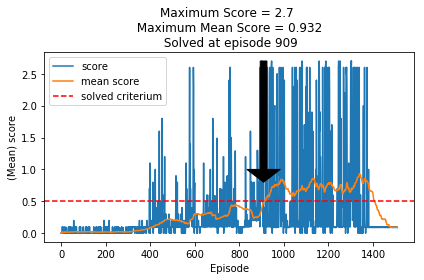

In [27]:
# v3
plt.plot(range(len(all_scores)), all_scores, label='score')
plt.plot(range(len(all_mean_scores)), all_mean_scores, label='mean score')
plt.axhline(0.5, linestyle='--', color='r', label='solved criterium')
plt.arrow(e_solved, max(all_scores), 0, -(max(all_scores)-1), color='black', zorder=3, shape='full', width=30, head_width=150, head_length=0.2)
plt.xlabel('Episode')
plt.ylabel('(Mean) score')
plt.title('Maximum Score = {0:.1f} \n Maximum Mean Score = {1:.3f} \n Solved at episode {2:d}'.format(max(all_scores), max(all_mean_scores), e_solved))
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(version, 'scores.png'))
plt.savefig(os.path.join(version, 'scores.pdf'))

## 4. Test the agent

In [2]:
from unityagents import UnityEnvironment
import torch
from agent import Agent
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
## Note: only run this cell if the environment is not loaded yet!

# load the Tennis app
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

# get Tennis app info
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]          # reset the environment 
states = env_info.vector_observations
state_size = states.shape[1]                               # get state size
action_size = brain.vector_action_space_size               # get action size
q_input_size = int(2 * (state_size + action_size))         # get critic input size
num_agents = len(env_info.agents)                          # get number of agents

# instantiate the DDPG agent
agent = Agent(state_size, action_size, random_seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# load network weights to DDPG agent
agent.actor_local.load_state_dict(torch.load('results/checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('results/checkpoint_critic.pth'))


Total score this episode: 0.10000000149011612
Total score this episode: 0.10000000149011612
Total score this episode: 2.600000038743019
Total score this episode: 0.09000000171363354
Total score this episode: 0.10000000149011612
Total score this episode: 0.10000000149011612
Total score this episode: 2.600000038743019
Total score this episode: 2.7000000402331352
Total score this episode: 2.600000038743019
Total score this episode: 0.10000000149011612


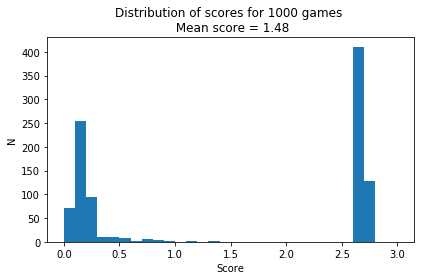

In [5]:
# Play 100 episodes
n=1000
all_scores = []
for i in range(n):                                         # play game for n episodes
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
                                                           # get next action from the ddpg agent
        actions = [agent.act(states[agent_i], add_noise=False) for agent_i in range(num_agents)]
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        states = env_info.vector_observations              # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        if np.any(dones):                                  # exit loop if episode finished
            break
    if i<10:
        print('Total score this episode: {}'.format(np.max(scores)))
    all_scores.append(np.max(scores))

    
plt.hist(all_scores, bins=np.linspace(0,3,31))
plt.xlabel('Score')
plt.ylabel('N')
plt.title('Distribution of scores for %d games \n Mean score = %.2f'%(n, np.mean(all_scores)))
plt.tight_layout()
plt.savefig('results/score_distribution.png')
plt.savefig('results/score_distribution.pdf')